In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as pty
import warnings
warnings.filterwarnings("ignore")

In [3]:
#load data to the data frame and check its char

df = pd.read_csv("credit_card.csv",index_col="index")
df.head()

,City,Date,Card Type,Exp Type,Gender,Amount
index,,,,,,
0,"Delhi, India",29-Oct-14,Gold,Bills,F,82475
1,"Greater Mumbai, India",22-Aug-14,Platinum,Bills,F,32555
2,"Bengaluru, India",27-Aug-14,Silver,Bills,F,101738
3,"Greater Mumbai, India",12-Apr-14,Signature,Bills,F,123424
4,"Bengaluru, India",5-May-15,Gold,Bills,F,171574


In [4]:
df.columns

Index(['City', 'Date', 'Card Type', 'Exp Type', 'Gender', 'Amount'], dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26052 entries, 0 to 26051
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   City       26052 non-null  object
 1   Date       26052 non-null  object
 2   Card Type  26052 non-null  object
 3   Exp Type   26052 non-null  object
 4   Gender     26052 non-null  object
 5   Amount     26052 non-null  int64 
dtypes: int64(1), object(5)
memory usage: 1.4+ MB


In [6]:
df.describe()

,Amount
count,26052.000000
mean,156411.537425
std,103063.254287
min,1005.000000
25%,77120.250000
50%,153106.500000
75%,228050.000000
max,998077.000000


In [7]:
df.shape

(26052, 6)

In [8]:
df['Date'] = pd.to_datetime(df['Date'])

In [9]:
df.head()

,City,Date,Card Type,Exp Type,Gender,Amount
index,,,,,,
0,"Delhi, India",2014-10-29,Gold,Bills,F,82475
1,"Greater Mumbai, India",2014-08-22,Platinum,Bills,F,32555
2,"Bengaluru, India",2014-08-27,Silver,Bills,F,101738
3,"Greater Mumbai, India",2014-04-12,Signature,Bills,F,123424
4,"Bengaluru, India",2015-05-05,Gold,Bills,F,171574


In [10]:
beng = df[df['City'] == "Bengaluru, India"]
beng.head()

,City,Date,Card Type,Exp Type,Gender,Amount
index,,,,,,
2,"Bengaluru, India",2014-08-27,Silver,Bills,F,101738
4,"Bengaluru, India",2015-05-05,Gold,Bills,F,171574
26,"Bengaluru, India",2014-03-23,Platinum,Bills,F,434427
28,"Bengaluru, India",2015-01-18,Platinum,Bills,F,987935
30,"Bengaluru, India",2014-07-31,Signature,Bills,F,225392


In [11]:
x = df['Gender'].value_counts()
x

F    13680
M    12372
Name: Gender, dtype: int64

In [12]:
city = df['City'].value_counts().reset_index(name="Count")
city10 = city.iloc[:10]

In [13]:
import plotly.express as px

In [14]:
px.pie(data_frame=city10,values=city10["Count"],title="Top 10 contribution to credit card usage",names=city10["index"])

(array([16010., 16071., 16130., 16191., 16252., 16314., 16375., 16436.,
        16495., 16556.]),
 [Text(16010.0, 0, '2013-11'),
  Text(16071.0, 0, '2014-01'),
  Text(16130.0, 0, '2014-03'),
  Text(16191.0, 0, '2014-05'),
  Text(16252.0, 0, '2014-07'),
  Text(16314.0, 0, '2014-09'),
  Text(16375.0, 0, '2014-11'),
  Text(16436.0, 0, '2015-01'),
  Text(16495.0, 0, '2015-03'),
  Text(16556.0, 0, '2015-05')])

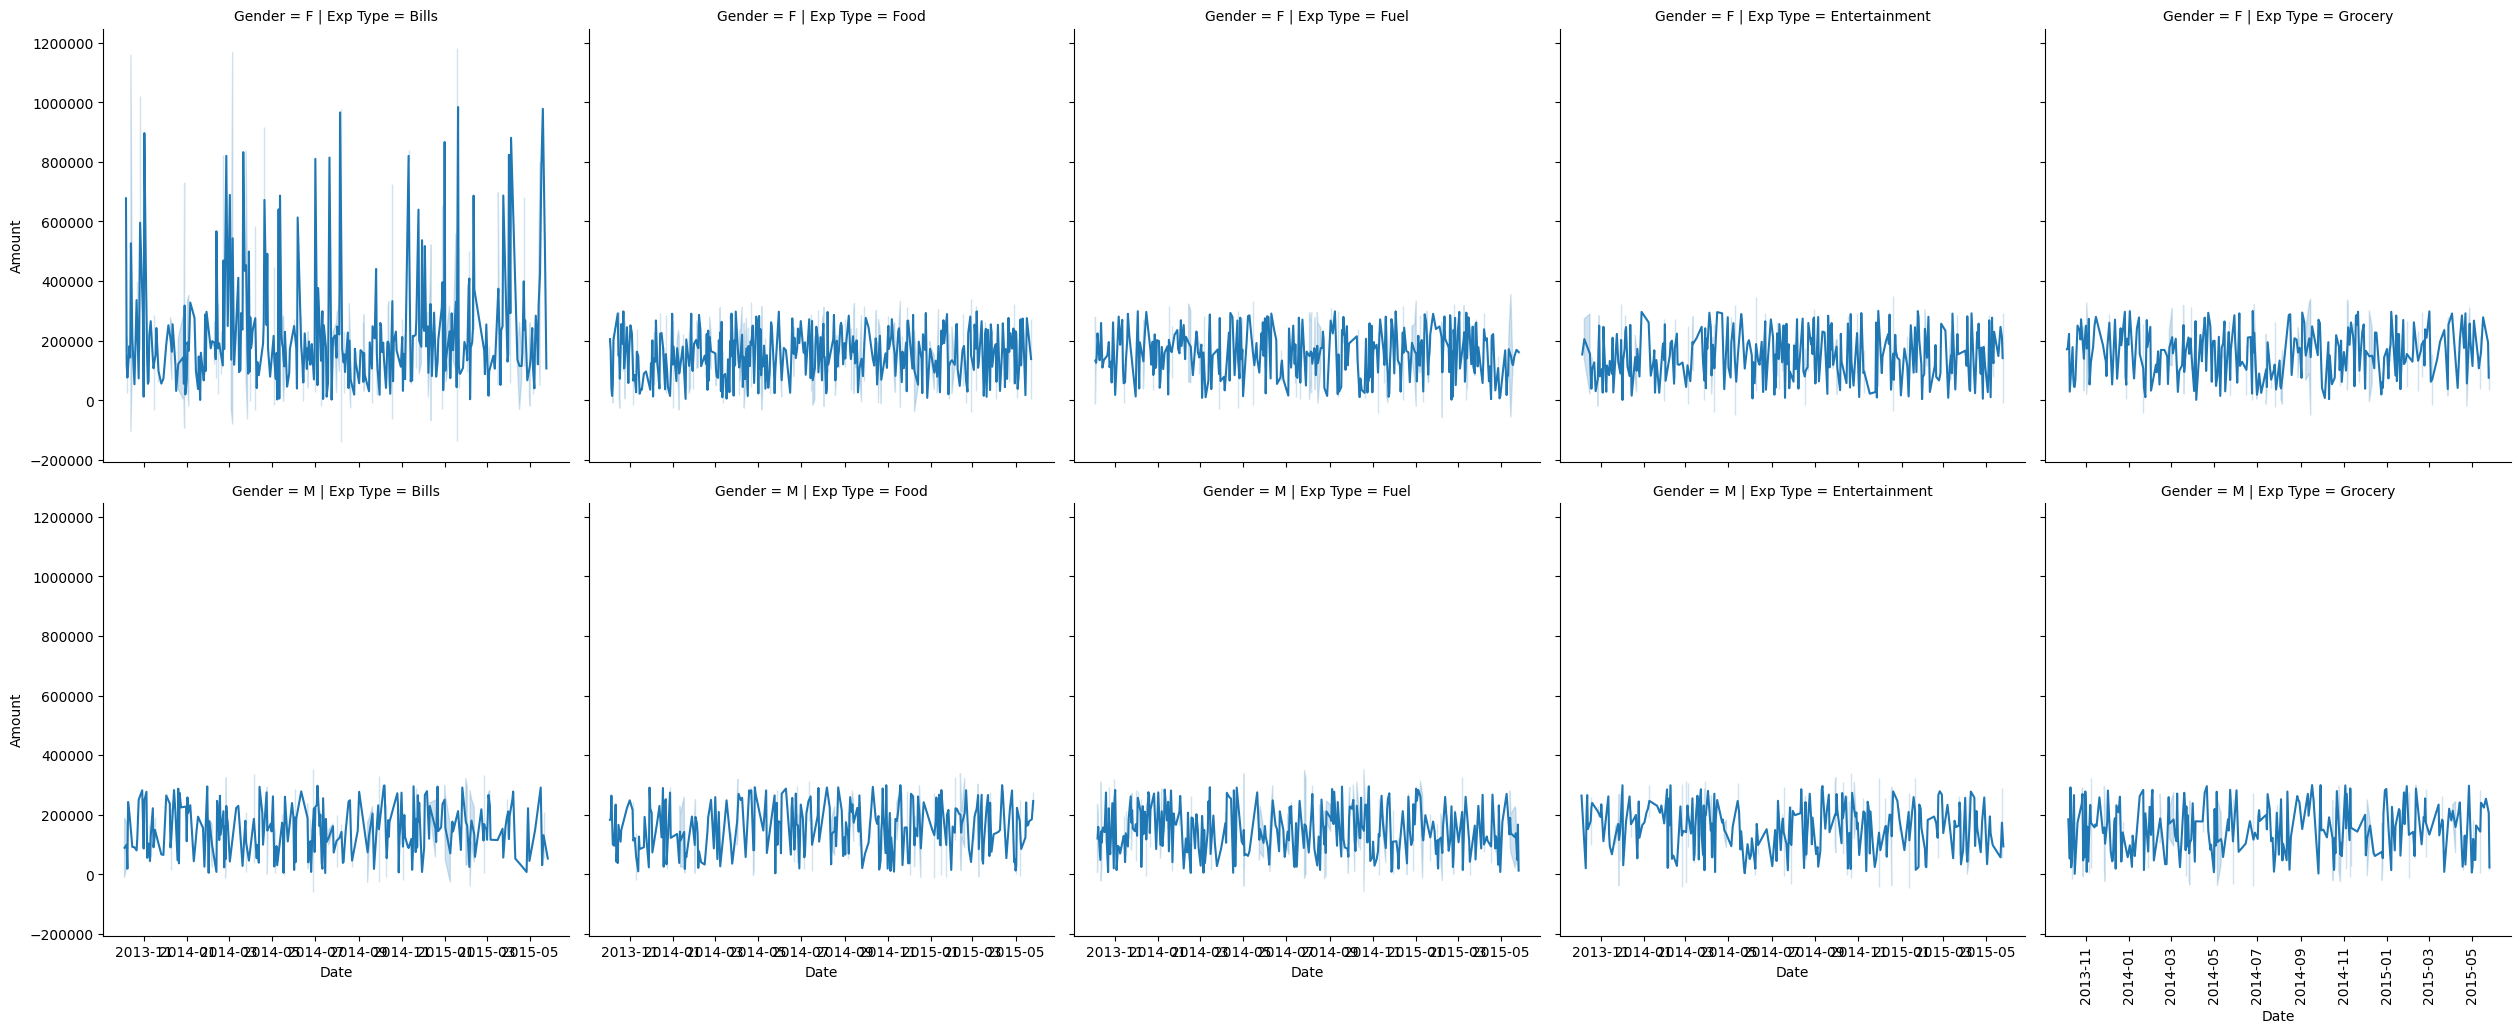

In [15]:

g = sns.relplot(data=beng,x="Date",y="Amount",kind="line",row="Gender",col="Exp Type",ci='sd')
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation =90)


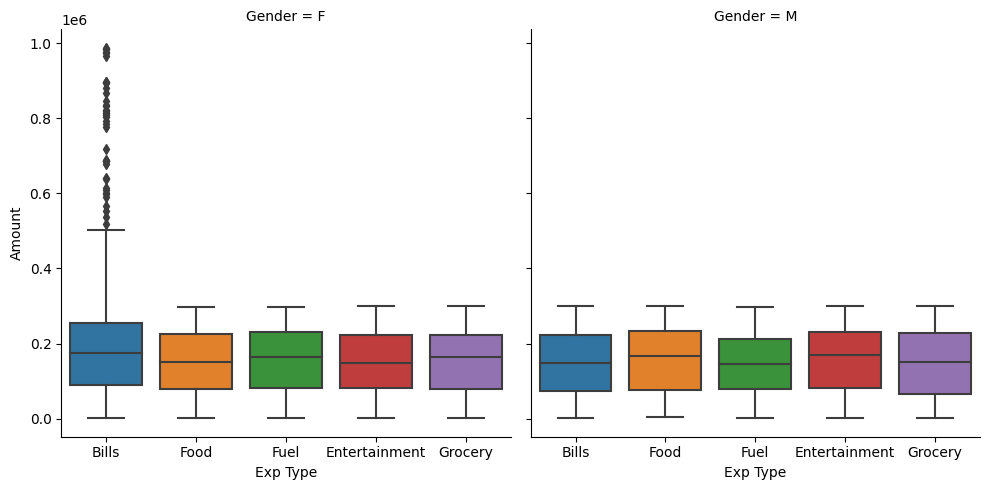

In [16]:
sns.catplot(data=beng,x="Exp Type",y="Amount",kind='box',col="Gender")

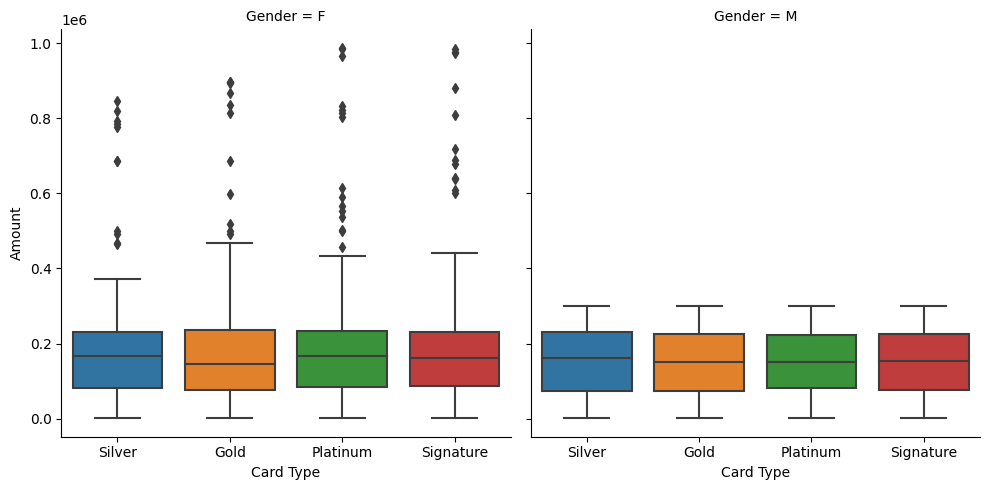

In [17]:
sns.catplot(data=beng,x="Card Type",y="Amount",kind='box',col="Gender")

([0, 1], [Text(0, 0, 'F'), Text(1, 0, 'M')])

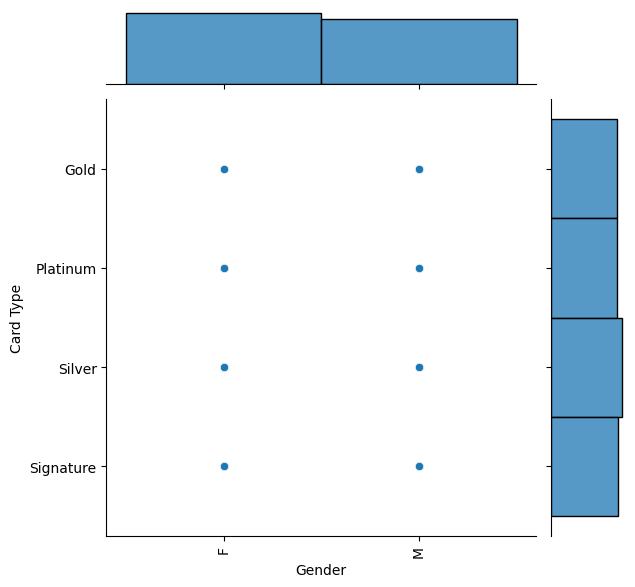

In [18]:
sns.jointplot(data=df,x="Gender",y="Card Type",kind='scatter')
plt.xticks(rotation=90)

In [19]:
df.select_dtypes("object")

,City,Card Type,Exp Type,Gender
index,,,,
0,"Delhi, India",Gold,Bills,F
1,"Greater Mumbai, India",Platinum,Bills,F
2,"Bengaluru, India",Silver,Bills,F
3,"Greater Mumbai, India",Signature,Bills,F
4,"Bengaluru, India",Gold,Bills,F
...,...,...,...,...
26047,"Kolkata, India",Silver,Travel,F
26048,"Pune, India",Signature,Travel,M
26049,"Hyderabad, India",Silver,Travel,M


In [20]:
df['City'].value_counts()

Bengaluru, India          3552
Greater Mumbai, India     3493
Ahmedabad, India          3491
Delhi, India              3482
Hyderabad, India           784
                          ... 
Rayagada, India              1
Varanasi, India              1
Hugli-Chinsurah, India       1
Alirajpur, India             1
Fazilka, India               1
Name: City, Length: 986, dtype: int64

In [21]:
df['City'].nunique()

986